In [11]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

class stock_percentile:
    def __init__(self, stocks):
        self.stocks = stocks

    def get_percentile(self):
        data = yf.download(self.stocks, period='1y', interval='1d')['Adj Close']
        pct_change = data.pct_change()
        pct_change_rank = pct_change.rank(axis=1, pct=True)
        return pct_change_rank

    def plot_percentile(self):
        pct_change_rank = self.get_percentile()
        pct_change_rank_21_ma = pct_change_rank.rolling(21).mean()
        plt.figure(figsize=(10,7))
        for i in range(len(self.stocks)):
            plt.plot(pct_change_rank_21_ma.index, pct_change_rank_21_ma[self.stocks[i]], label=self.stocks[i])
        plt.legend()
        plt.show()

    def avg_percentile(self):
        pct_change_rank = self.get_percentile()
        avg_pct_change_rank = pct_change_rank.mean(axis=1)
        return avg_pct_change_rank

[*********************100%***********************]  3 of 3 completed
[*********************100%***********************]  3 of 3 completed


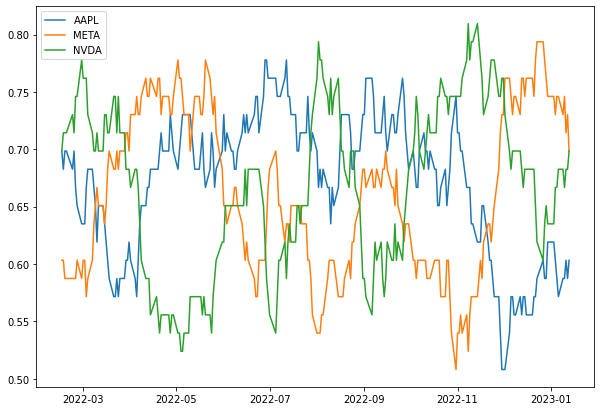

[*********************100%***********************]  3 of 3 completed
AAPL    0.669333
META    0.658667
NVDA    0.672000
dtype: float64


In [12]:

# Create a list of stocks
stocks = ['AAPL','META','NVDA']

# Create an instance of the stock_percentile class
sp = stock_percentile(stocks)

# Get and plot the percentiles of the stocks
sp.get_percentile()
sp.plot_percentile()

# Get and print the average percentile of all stocks for each date
avg_pct_change_rank = sp.avg_percentile()
print(avg_pct_change_rank)

In [14]:
avg_pct_change_rank

AAPL    0.669333
META    0.658667
NVDA    0.672000
dtype: float64

In [13]:
sp.avg_percentile()

[*********************100%***********************]  3 of 3 completed


AAPL    0.669333
META    0.658667
NVDA    0.672000
dtype: float64